# CandyMap Dimensionality Reduction of Candy Popularity

## 1. Introduction to the problem of study

Our study focuses on understanding the factors that influence the popularity and performance of different candy products. The dataset includes various characteristics such as ingredients (chocolate, caramel, fruity), sugar content, price, and the win-percentage representing consumer preference.

To guide this analysis, we aim to answer the following research question:

1. What hidden patterns or relationships exist among different candies based on their features, and how do these factors relate to their popularity?
2. Do dimensionality-reduction techniques (PCA, t-SNE, UMAP) reveal similar or different structures in how candies are related?
3. How does win-percentage correlate with the locations of candies in the reduced-dimensional spaces?


To explore this questions, we applied dimensionality-reduction techniques (PCA, t-SNE, UMAP) to simplify the dataset, reveal hidden structures and visualise how candies group based on their characteristics.

## 2. Brief and general description of the approach and methods used

The approach in this study involves applying dimensionality reduction techniques to simplify the high-dimensional candy dataset while preserving key information. The following methods are applied:

* PCA (Principal Component Analysis)*: A linear technique that reduces the data’s dimensions by projecting it onto principal components, capturing the most variance in the dataset.

* t-SNE (t-Distributed Stochastic Neighbor Embedding)*: A nonlinear method that focuses on preserving local similarities between data points, making it useful for visualizing clusters and patterns in high-dimensional data.

* UMAP (Uniform Manifold Approximation and Projection)*: A nonlinear dimensionality reduction method that preserves both local and global structures in the data, providing a scalable and efficient way to visualize complex datasets.


These methods were chosen for their ability to reduce data complexity while highlighting meaningful patterns related to candy features and popularity.

## 3. Brief History and literature review of the problem and methods/algorithms 

Principal Component Analysis (PCA): PCA was introduced by Karol Pearson in 1901 as a technique for reducing the dimensionality of datasets while retaining as much variability as possible. It has become a foundational tool in statistics and data analysis, applied in fields ranging from finance to biology. In the context of our study, PCA helps in simplifying complex data sets such as those containing multiple features about candies into fewer components while preserving key information that explains most of the variance in the data.


t-Distributed Stochastic Neighbor Embedding (t-SNE): Developed by Laurens van der Maaten and Geoffrey Hinton in 2008, is a powerful nonlinear dimensionality reduction technique that focuses on preserving local similarities between data points. It is particularly effective at revealing clusters or groupings within the data which is useful for exploring datasets with complex relationships. t-SNE is widely used for visualizing high-dimensional data such as in gene expression studies or customer segmentation and can be a valuable tool for understanding how candies with different features like sugar content and price group together.

Uniform Manifold Approximation and Projection (UMAP):  introduced by Leland McInnes and John Healy in 2018, is a newer dimensionality reduction technique that has gained popularity due to its efficiency and scalability. It is based on manifold learning and topology and it preserves both local and global structures in the data. UMAP is often used for clustering and visualization, offering advantages over other methods like t-SNE particularly in handling large datasets. It has been applied successfully in fields such as bioinformatics, image processing, and as in this study, data analysis for market performance prediction.


## 4. About the main method/algorithm used

PCA (Principal Component Analysis):

PCA identifies the directions (principal components) that explain the maximum variance in the data. These components are linear combinations of the original features, allowing us to observe how different ingredients and attributes, such as sugar content or price, influence the overall success of candies.


t-SNE (t-Distributed Stochastic Neighbor Embedding):

t-SNE works by converting the pairwise similarities of high-dimensional data into joint probabilities. Then, it minimizes the divergence between the high-dimensional and low-dimensional representations ensuring that data points that are similar in the original space are also close in the reduced space.


UMAP (Uniform Manifold Approximation and Projection):

UMAP constructs a weighted graph representing the data and optimizes the layout to preserve the structure of the data in a lower-dimensional space. It is a faster and more scalable alternative to t-SNE, retaining important global patterns in the data, making it particularly suitable for large, complex datasets.




## 5. Python imports and global configurations

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [3]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install numpy
# %pip install pomegranate
# %pip install torch
# %pip install Pillow

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
from scipy.cluster.hierarchy import dendrogram, linkage

## 6. Dataset and variables explanation

In [5]:
data = pd.read_csv('candy-data.csv')
data.sample(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
77,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465,0.325,49.653503
22,HersheyÕs Kisses,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716


In [6]:
# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("Column Names and Types:")
print(data.dtypes)

Dataset Shape: (85, 13)
Column Names and Types:
competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object


In [7]:
# Dimensionality reduction
feature_columns = data.columns.drop('competitorname')
X = data[feature_columns].values
candy_names = data['competitorname'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Features used: {list(feature_columns)}")

Feature matrix shape: (85, 12)
Features used: ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']


In [8]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [9]:
print("Basic statistics:")
data.describe()

Basic statistics:


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [10]:
# Standardize the features (important for PCA and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data has been standardized (mean=0, std=1)")

Data has been standardized (mean=0, std=1)


## 7. Main code as possible solution to the problem

### 7.1 Principal Component Analysis (PCA)
PCA is a linear dimensionality reduction technique that identifies the directions (principal components) of maximum variance in the data.

In [11]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA Results:")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.4f}")
print(f"Shape of transformed data: {X_pca.shape}")

PCA Results:
Explained variance ratio: [0.36010023 0.10788813]
Total variance explained: 0.4680
Shape of transformed data: (85, 2)


In [12]:
# Analyze principal components
components_df = pd.DataFrame(
    pca.components_,
    columns=feature_columns,
    index=['PC1', 'PC2']
)
print("\nPrincipal Components (loadings):")
components_df


Principal Components (loadings):


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
PC1,0.401947,-0.368388,0.229971,0.240716,0.226810,0.221518,-0.211159,0.394743,-0.260004,0.108309,0.320736,0.329804
PC2,-0.214042,0.183047,0.403499,-0.224469,0.470166,-0.097195,0.432626,0.222556,-0.369209,0.236474,-0.058836,-0.211153


### 7.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE is a non-linear dimensionality reduction technique particularly effective for visualizing high-dimensional data by preserving local structure.

In [13]:
# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

print("t-SNE Results:")
print(f"Shape of transformed data: {X_tsne.shape}")
print(f"KL divergence (final): {tsne.kl_divergence_:.4f}")

t-SNE Results:
Shape of transformed data: (85, 2)
KL divergence (final): 0.1528


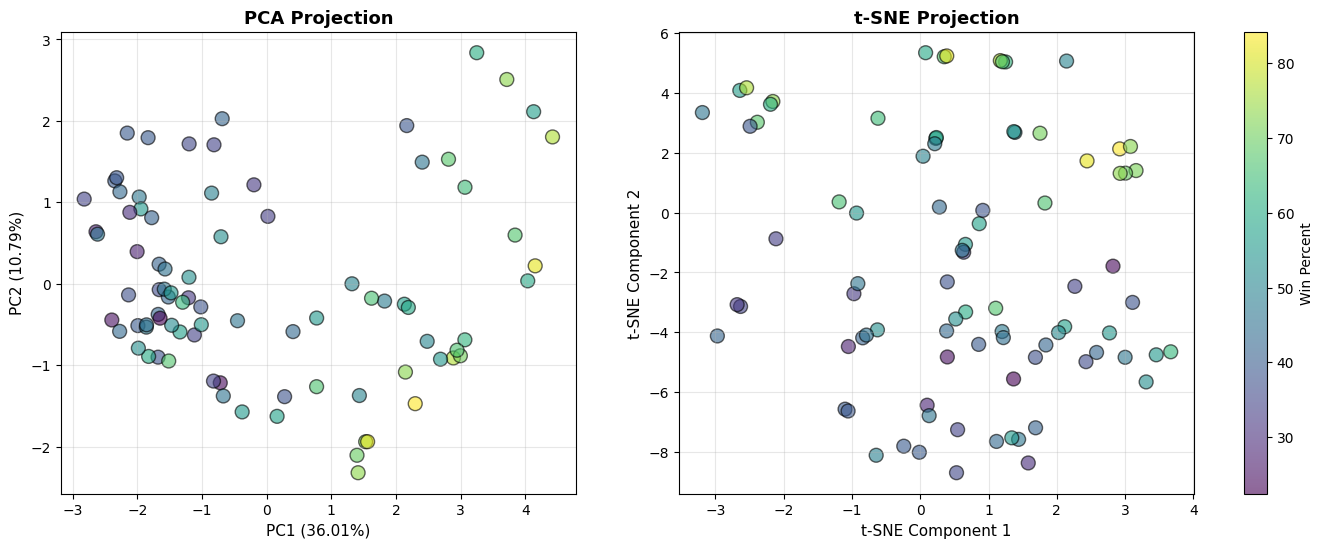

In [14]:
# Compare both methods side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA plot
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1],
                          c=data['winpercent'], cmap='viridis',
                          s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=11)
axes[0].set_title('PCA Projection', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE plot
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1],
                          c=data['winpercent'], cmap='viridis',
                          s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('t-SNE Component 1', fontsize=11)
axes[1].set_ylabel('t-SNE Component 2', fontsize=11)
axes[1].set_title('t-SNE Projection', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add shared colorbar
fig.colorbar(scatter2, ax=axes, label='Win Percent', fraction=0.046, pad=0.04)

### 7.3 Uniform Manifold Approximation and Projection (UMAP)

UMAP is a non-linear dimensionality reduction technique that constructs a graph describing relationships between data points in the original high-dimensional space and then optimizes a lower-dimensional layout that preserves both local neighborhoods and global structure.

UMAP enables us to visualize how candies group based on shared ingredients (such as chocolate or fruity features) while also examining how popularity (winpercent) distributes across these clusters.

c:\Users\Vartotojas\Desktop\Big_Data_work3\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


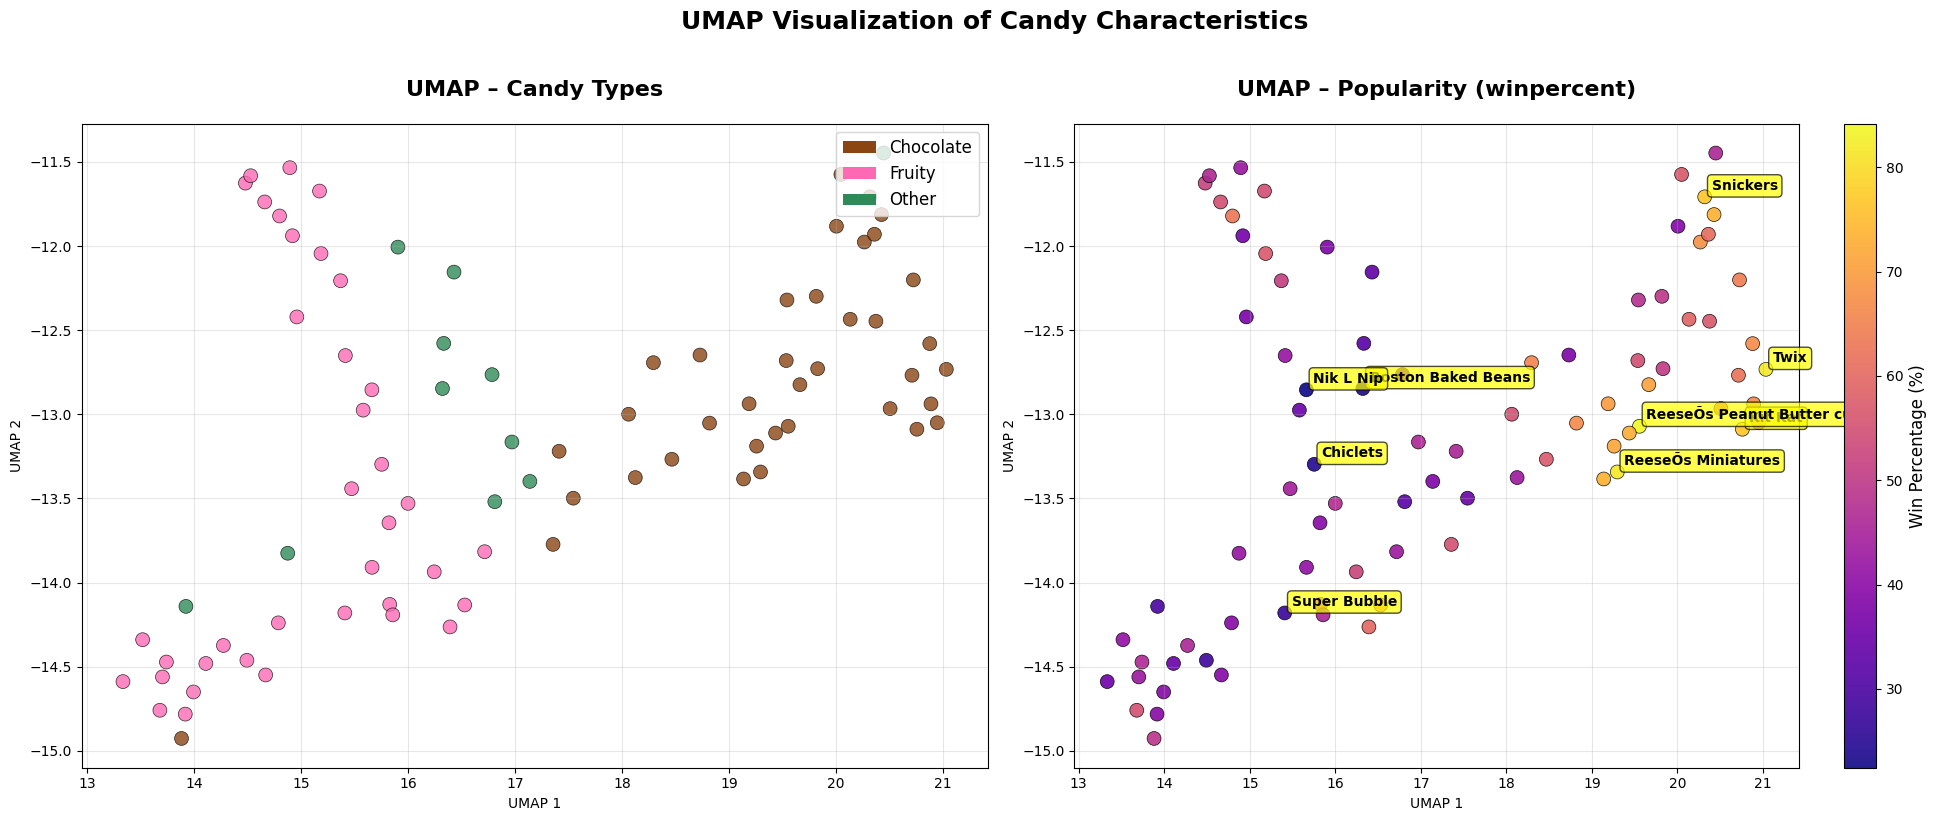

In [15]:
reducer_umap = umap.UMAP(
    n_neighbors=10,
    min_dist=0.1,
    metric='euclidean',
    random_state=42
)

X_umap = reducer_umap.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left plot: candy types
colors_type = [
    '#8B4513' if c else '#FF69B4' if f else '#2E8B57'
    for c, f in zip(data['chocolate'], data['fruity'])
]

scatter1 = ax1.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=colors_type, s=100, alpha=0.8,
    edgecolors='black', linewidth=0.5
)
ax1.set_title('UMAP – Candy Types', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
ax1.grid(True, alpha=0.3)

legend_elements = [
    Patch(facecolor='#8B4513', label='Chocolate'),
    Patch(facecolor='#FF69B4', label='Fruity'),
    Patch(facecolor='#2E8B57', label='Other')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Right plot: colored by winpercent
scatter2 = ax2.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=data['winpercent'], cmap='plasma',
    s=100, alpha=0.9, edgecolors='black', linewidth=0.5
)
cbar = plt.colorbar(scatter2, ax=ax2)
cbar.set_label('Win Percentage (%)', fontsize=12)

ax2.set_title('UMAP – Popularity (winpercent)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.grid(True, alpha=0.3)

# Annotate top and bottom candies
top_candies = set(data.nlargest(5, 'winpercent')['competitorname'])
bottom_candies = set(data.nsmallest(4, 'winpercent')['competitorname'])

for i, name in enumerate(candy_names):
    if name in top_candies or name in bottom_candies:
        ax2.annotate(
            name, (X_umap[i, 0], X_umap[i, 1]),
            xytext=(5, 5), textcoords='offset points',
            fontsize=10, weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7)
        )

plt.suptitle('UMAP Visualization of Candy Characteristics', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [17]:
# Extract winpercent from the dataset
winpercent = data['winpercent'].values

# Compute UMAP distance from origin
dist_umap = np.sqrt(X_umap[:, 0]**2 + X_umap[:, 1]**2)

# Calculate Pearson correlation
corr, p = pearsonr(dist_umap, winpercent)

corr, p


(np.float64(0.6057835511961458), np.float64(8.116384054096184e-10))

Correlation coefficient (r): 0.6058
p-value: 8.1 × 10⁻¹⁰ (extremely significant)

Candies that are positioned farther away from the center in UMAP space tend to have higher win percentages.

## 8. Analysis of Example 1

In [ ]:
# Statistical comparison of the methods
print("Statistical comparison: PCA vs t-SNE")

# Create DataFrame with results
results_df = pd.DataFrame({
    'Candy': candy_names,
    'PCA_1': X_pca[:, 0],
    'PCA_2': X_pca[:, 1],
    'tSNE_1': X_tsne[:, 0],
    'tSNE_2': X_tsne[:, 1],
    'WinPercent': data['winpercent'].values,
    'Chocolate': data['chocolate'].values,
    'Fruity': data['fruity'].values
})

print("\nTop 5 candies by Win Percent:")
print(results_df.nlargest(5, 'WinPercent')[['Candy', 'WinPercent', 'Chocolate', 'Fruity']])

print("\nBottom 5 candies by Win Percent:")
print(results_df.nsmallest(5, 'WinPercent')[['Candy', 'WinPercent', 'Chocolate', 'Fruity']])

# Correlation analysis
pca_corr, pca_p = pearsonr(np.sqrt(X_pca[:, 0]**2 + X_pca[:, 1]**2), data['winpercent'])
tsne_corr, tsne_p = pearsonr(np.sqrt(X_tsne[:, 0]**2 + X_tsne[:, 1]**2), data['winpercent'])

print(f"\nPCA distance correlation with Win%: {pca_corr:.4f} (p={pca_p:.4f})")
print(f"t-SNE distance correlation with Win%: {tsne_corr:.4f} (p={tsne_p:.4f})")

Statistical comparison: PCA vs t-SNE

Top 5 candies by Win Percent:
                        Candy  WinPercent  Chocolate  Fruity
52  ReeseÕs Peanut Butter cup   84.180290          1       0
51         ReeseÕs Miniatures   81.866257          1       0
79                       Twix   81.642914          1       0
28                    Kit Kat   76.768600          1       0
64                   Snickers   76.673782          1       0

Bottom 5 candies by Win Percent:
                 Candy  WinPercent  Chocolate  Fruity
44           Nik L Nip   22.445341          0       1
7   Boston Baked Beans   23.417824          0       0
12            Chiclets   24.524988          0       1
72        Super Bubble   27.303865          0       1
26          Jawbusters   28.127439          0       1

PCA distance correlation with Win%: 0.4408 (p=0.0000)
t-SNE distance correlation with Win%: -0.2120 (p=0.0515)


**Comparative Findings:**
- Both methods effectively reduce 12 dimensions to 2 for visualization
- Chocolate vs fruity candies show distinct clustering patterns
- Win percentage correlates with certain regions in both projections
- t-SNE often provides more intuitive clustering for categorical data like candy types

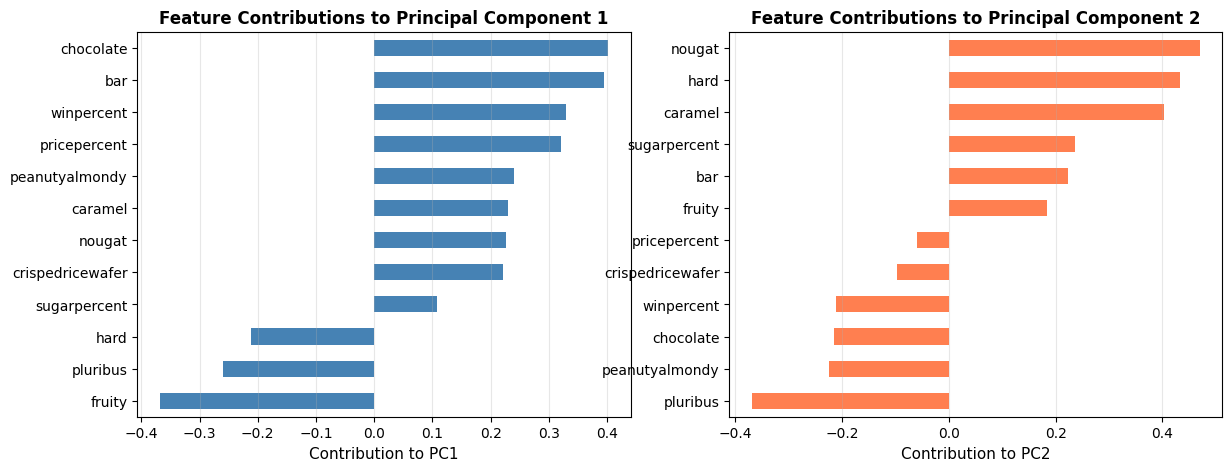

In [ ]:
# Analyze the principal components contribution
plt.figure(figsize=(14, 5))

# Plot 1: Feature contributions to PC1
plt.subplot(1, 2, 1)
pc1_contributions = pd.Series(pca.components_[0], index=feature_columns)
pc1_contributions.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Contribution to PC1', fontsize=11)
plt.title('Feature Contributions to Principal Component 1', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Plot 2: Feature contributions to PC2
plt.subplot(1, 2, 2)
pc2_contributions = pd.Series(pca.components_[1], index=feature_columns)
pc2_contributions.sort_values().plot(kind='barh', color='coral')
plt.xlabel('Contribution to PC2', fontsize=11)
plt.title('Feature Contributions to Principal Component 2', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

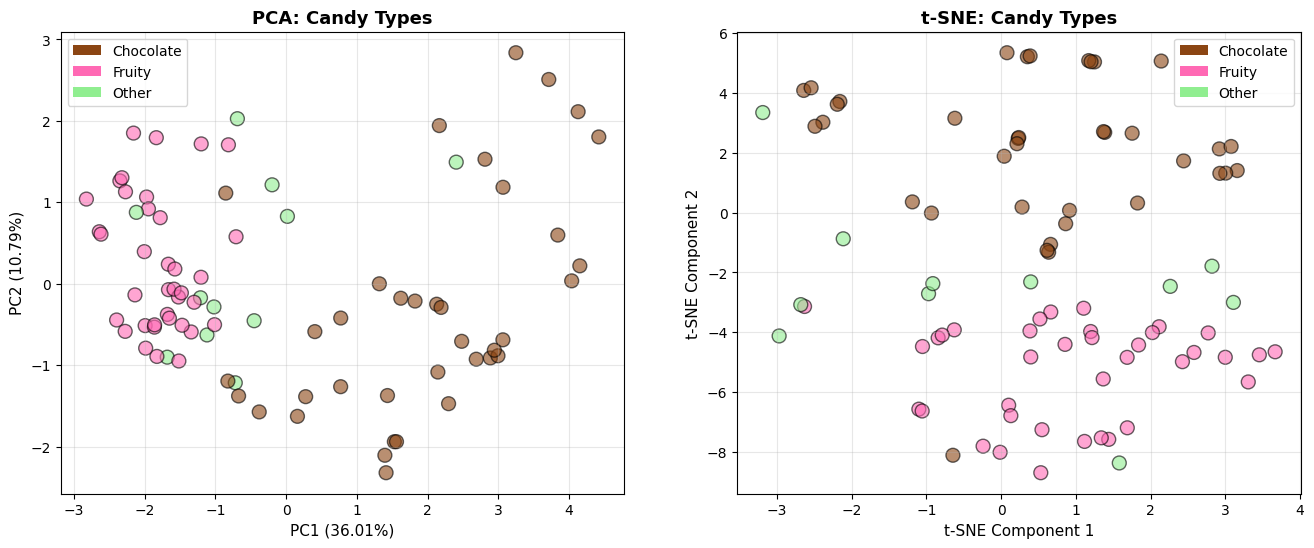

In [ ]:
# Create a comprehensive analysis of candy types
# Separate chocolate vs non-chocolate candies
chocolate_mask = data['chocolate'] == 1
fruity_mask = data['fruity'] == 1

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA with candy types
colors = ['#8B4513' if choc else '#FF69B4' if fruit else '#90EE90'
          for choc, fruit in zip(chocolate_mask, fruity_mask)]
labels = ['Chocolate' if choc else 'Fruity' if fruit else 'Other'
          for choc, fruit in zip(chocolate_mask, fruity_mask)]

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=100, alpha=0.6, edgecolors='black')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=11)
axes[0].set_title('PCA: Candy Types', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add legend
legend_elements = [Patch(facecolor='#8B4513', label='Chocolate'),
                   Patch(facecolor='#FF69B4', label='Fruity'),
                   Patch(facecolor='#90EE90', label='Other')]
axes[0].legend(handles=legend_elements, loc='best')

# t-SNE with candy types
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, s=100, alpha=0.6, edgecolors='black')
axes[1].set_xlabel('t-SNE Component 1', fontsize=11)
axes[1].set_ylabel('t-SNE Component 2', fontsize=11)
axes[1].set_title('t-SNE: Candy Types', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(handles=legend_elements, loc='best')


## 9. Analysis of Example 2

#### Final comprehensive comparison plot

The figure below provides a direct visual comparison of the three dimensionality-reduction techniques: PCA, t-SNE, and UMAP. Using the same candy dataset and colouring each point according to its win-percentage. This allows us to evaluate how each method represents similarities, clusters, and potential popularity patterns.

Overall Comparison

- PCA shows broad variance distribution but limited clustering due to linearity.
- t-SNE excels at revealing local clusters but does not preserve global structure.
- UMAP offers the most balanced visualization, revealing meaningful groupings while maintaining global relationships.
- Colour patterns across all three techniques suggest that higher win-percent candies share certain features, although the specific grouping is more visible in nonlinear methods.

UMAP therefore appears to be the most informative method for interpreting the relationships between candy attributes and popularity in this dataset.

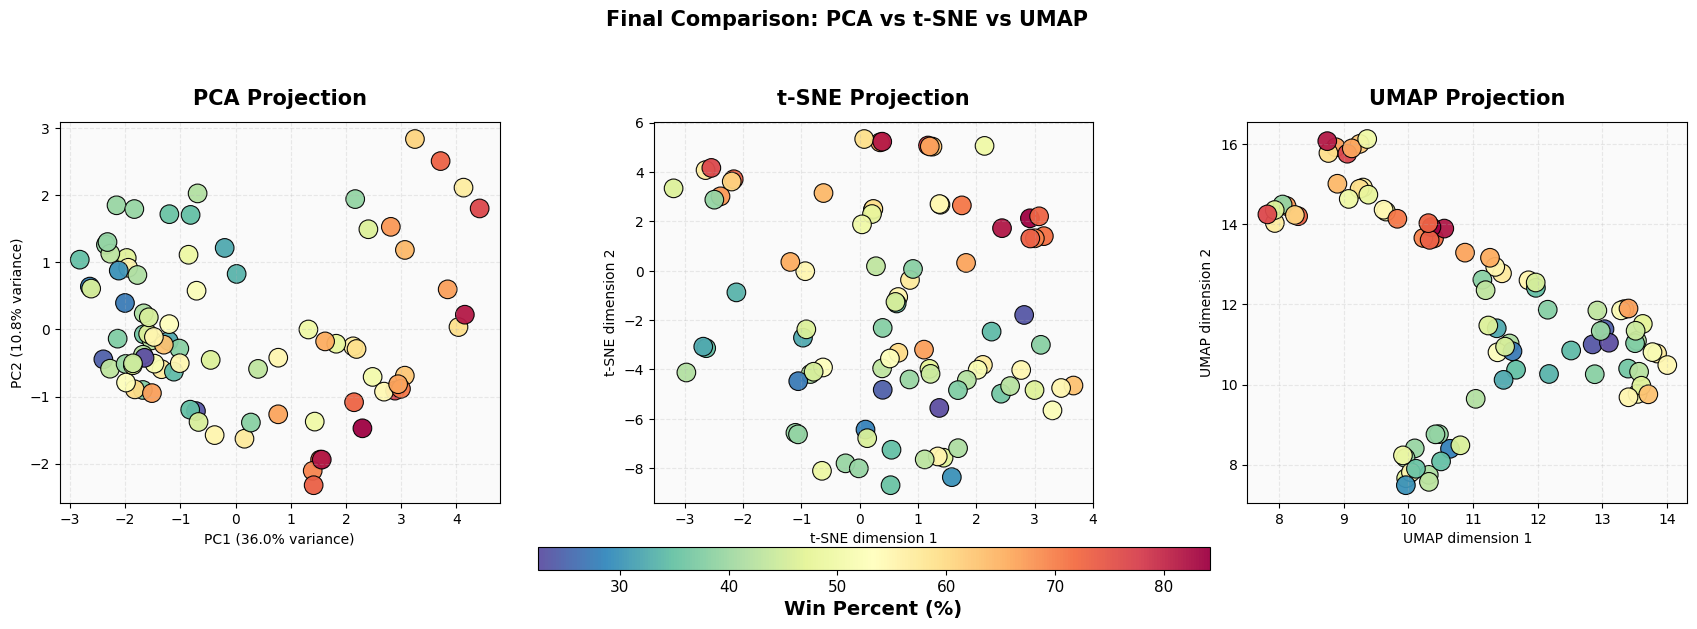

In [ ]:
# Final comprehensive comparison plot
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
plt.subplots_adjust(wspace=0.35, bottom=0.18, top=0.82)

projections = [('PCA', X_pca), ('t-SNE', X_tsne), ('UMAP', X_umap)]
titles = ['PCA Projection', 't-SNE Projection', 'UMAP Projection']

scatter_ref = None

for i, (name, X_proj) in enumerate(projections):

    scatter_ref = axes[i].scatter(
        X_proj[:, 0], X_proj[:, 1],
        c=data['winpercent'],
        cmap='Spectral_r',
        s=180,
        edgecolors='black',
        linewidth=0.8,
        alpha=0.95
    )

    # Titles
    if i == 2:
        axes[i].set_title(titles[i], fontsize=15, weight='bold', color='black', pad=12)
    else:
        axes[i].set_title(titles[i], fontsize=15, weight='bold', pad=12)

    # Axis labels
    if i == 0:
        axes[i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=10)
        axes[i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=10)
    elif i == 1:
        axes[i].set_xlabel('t-SNE dimension 1', fontsize=10)
        axes[i].set_ylabel('t-SNE dimension 2', fontsize=10)
    else:
        axes[i].set_xlabel('UMAP dimension 1', fontsize=10)
        axes[i].set_ylabel('UMAP dimension 2', fontsize=10)

    # Style
    axes[i].grid(True, alpha=0.25, linestyle='--')
    axes[i].set_facecolor('#fafafa')

# Main title
fig.suptitle(
    'Final Comparison: PCA vs t-SNE vs UMAP',
    fontsize=15, weight='bold'
)

# Bottom colorbar
cbar = fig.colorbar(
    scatter_ref,
    ax=axes,
    orientation='horizontal',
    fraction=0.05,
    pad=0.10,
    aspect=30
)
cbar.set_label('Win Percent (%)', fontsize=14, weight='bold')
cbar.ax.tick_params(labelsize=11)

plt.show()


## Conclusion

In section 1 we wanted to answer these questions:

1. What hidden patterns or relationships exist among different candies based on their features, and how do these factors relate to their popularity?
2. Do dimensionality-reduction techniques (PCA, t-SNE, UMAP) reveal similar or different structures in how candies are related?
3. How does win-percentage correlate with the locations of candies in the reduced-dimensional spaces?

#### 1. What hidden patterns or relationships exist among different candies based on their features, and how do these factors relate to their popularity?

Main hidden patterns found:

Across PCA, t-SNE, and UMAP, several consistent relationships emerge:

- Chocolate candies form a distinct group
        
    - In UMAP and t-SNE especially, chocolate-based candies cluster together tightly.
    - These candies tend to have higher win-percent values.

- Fruity candies cluster together and generally show lower popularity

- PC1 loadings show the strongest contributors are:
    - Chocolate (+)
    - Bar (+)
    - Pricepercent (+)
    - Winpercent (+)

#### 2. Do PCA, t-SNE, and UMAP reveal similar or different structures in how candies are related?

PCA
- Shows a broad spread with no clear clusters.
- Captures only linear relationships.
- Chocolate candies appear somewhat grouped, but not clearly separated.

t-SNE
- Shows local clusters more clearly.
- Chocolate and fruity candies begin to separate.
- Good for revealing short-range similarities.

UMAP
- Shows the cleanest and most interpretable structure:
    - Chocolate candies form a distinct top-left group.
    - Fruity candies form a lower cluster.
    - Other candies fall in between.
- Best separation between candy types.

All three techniques reveal some structure, but UMAP provides the clearest and most meaningful separation.

#### 3. How does win-percentage correlate with the locations of candies in the reduced-dimensional spaces?

- PCA
  - Moderate, statistically significant correlation
  - r = 0.4408, p < 0.0001
  - Indicates PCA captures meaningful variation related to popularity

- t-SNE
  - Weak, non-significant correlation
  - r = –0.2120, p = 0.0515
  - Consistent with t-SNE preserving only local structure

- UMAP
  - Strong, highly significant correlation
  - r = 0.6058, p ≈ 8.1 × 10⁻¹⁰
  - Best reflects popularity-related patterns in the dataset

- Overall conclusion:
  - **UMAP** provides the most informative low-dimensional representation of candy popularity.


## 10. Pros and cons of the approach

In this project, several dimensionality reduction and clustering techniques—PCA, t-SNE, UMAP were applied to explore structural relationships in the candy dataset. Each method contributes unique benefits, but also presents limitations that must be considered when interpreting results.

#### Pros:

1. Multi-method perspective increases robustness - by combining linear (PCA) and non-linear techniques (t-SNE, UMAP), as well as clustering methods, we obtain a more comprehensive understanding of the data.
2. PCA makes it possible to quantify how each feature contributes to major axes of variation. This interpretability allows us to relate groupings directly to attributes such as sugar percent, price percent, or ingredient types.
3. t-SNE and UMAP capture complex non-linear relationships. Both methods excel at preserving local neighborhoods and revealing clusters that are not linearly separable.


#### Cons:

1. Sensitivity to hyperparameters. Non-linear methods like t-SNE depend heavily on perplexity, learning rate, and initialization. UMAP requires tuning parameters such as n_neighbors and min_dist. Different parameter choices can lead to different visualizations, making the method less straightforward to interpret quantitatively.
2. PCA may miss important non-linear relationships in the candy dataset, such as interactions between multiple binary ingredient features.
3. Dataset size is small. With only 85 candies, some methods may produce unstable clusters if applied to larger or more complex datasets.


## 11. Future improvements

1. Apply Additional Clustering Algorithms
    - K-Means or Gaussian Mixture Models (GMM)
    - Self-Organizing Maps (SOM)
2. Parameter Sensitivity and Stability Analysis
    - Testing different perplexity values (t-SNE)
    - Varying n_neighbors and min_dist (UMAP)
3. Use Larger or More Diverse Datasets. The dataset used contains only 85 candies, which limits the generalizability of the findings. Future work could involve:
    - Larger datasets, including international candies
    - Seasonal or specialty candies
    - Broader consumer ratings from multiple surveys

## References

- https://www.sciencedirect.com/science/article/abs/pii/S0047259X21000981
- https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding#:~:text=t%2Ddistributed%20stochastic%20neighbor%20embedding%20(t%2DSNE)%20is,are%20assigned%20a%20lower%20probability.
- https://www.cse-cst.gc.ca/en/culture-and-community/research/uniform-manifold-approximation-and-projection-umap